In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# drive.mount('/content/drive')

# df1 = pd.read_csv('/content/drive/My Drive/Data/TATAMOTORS_22_May.csv')
# df2 = pd.read_csv('/content/drive/My Drive/Data/NSEBANK_22_May.csv')
# df3 = pd.read_csv('/content/drive/My Drive/Data/NSEI_22_May.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df1[['Close']])
scaled_data1 = scaler.transform(df1[['Close']])

scaler.fit(df2[['Close']])
scaled_data2 = scaler.transform(df2[['Close']])

scaler.fit(df3[['Close']])
scaled_data3 = scaler.transform(df3[['Close']])

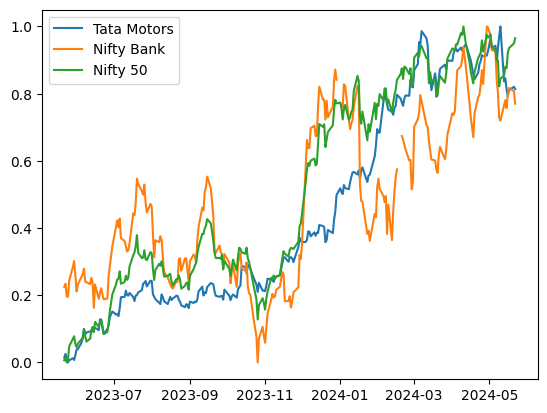

In [ ]:
plt.plot(df1['Date'], scaled_data1)
plt.plot(df2['Date'], scaled_data2)
plt.plot(df3['Date'], scaled_data3)

plt.legend(['Tata Motors', 'Nifty Bank', 'Nifty 50'])

In [ ]:
df11 = df1.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df21 = df2.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df31 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df21.rename(columns={'Close': 'Close1'}, inplace=True)
df31.rename(columns={'Close': 'Close2'}, inplace=True)
merged_df = pd.merge(df31, df21, on='Date')
df = pd.merge(df11, merged_df, on='Date')

In [ ]:
df

,Date,Close,Close2,Close1
0,2023-05-22,522.500000,18314.400391,43885.101563
1,2023-05-23,528.500000,18348.000000,43954.449219
2,2023-05-24,520.200012,18285.400391,43677.851563
3,2023-05-25,514.849976,18321.150391,43681.398438
4,2023-05-26,518.450012,18499.349609,44018.000000
...,...,...,...,...
241,2024-05-15,947.299988,22200.550781,47687.449219
242,2024-05-16,936.400024,22403.849609,47977.050781
243,2024-05-17,945.700012,22466.099609,48115.648438
244,2024-05-21,951.299988,22529.050781,48048.199219


In [ ]:
for i in range(len(df11)):
  if (i >= 3):
    df.loc[i, 'Prev_1'] = df.iloc[i - 3]['Close']
    df.loc[i, 'Prev_2'] = df.iloc[i - 2]['Close']
    df.loc[i, 'Prev_3'] = df.iloc[i - 1]['Close']
    df.loc[i, 'Prev_NB_1'] = df.iloc[i - 3]['Close1']
    df.loc[i, 'Prev_NB_2'] = df.iloc[i - 2]['Close1']
    df.loc[i, 'Prev_NB_3'] = df.iloc[i - 1]['Close1']
    df.loc[i, 'Prev_NF_1'] = df.iloc[i - 3]['Close2']
    df.loc[i, 'Prev_NF_2'] = df.iloc[i - 2]['Close2']
    df.loc[i, 'Prev_NF_3'] = df.iloc[i - 1]['Close2']
df.drop(['Close1', 'Close2'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.rename(columns={'Close': 'Estimate'}, inplace=True)

In [ ]:
Dates = df['Date']
X = df.drop(['Estimate', 'Date'], axis=1)
y = df['Estimate']

In [ ]:
X.head()

,Prev_1,Prev_2,Prev_3,Prev_NB_1,Prev_NB_2,Prev_NB_3,Prev_NF_1,Prev_NF_2,Prev_NF_3
3,522.500000,528.500000,520.200012,43885.101563,43954.449219,43677.851563,18314.400391,18348.000000,18285.400391
4,528.500000,520.200012,514.849976,43954.449219,43677.851563,43681.398438,18348.000000,18285.400391,18321.150391
5,520.200012,514.849976,518.450012,43677.851563,43681.398438,44018.000000,18285.400391,18321.150391,18499.349609
6,514.849976,518.450012,521.450012,43681.398438,44018.000000,44311.898438,18321.150391,18499.349609,18598.650391
7,518.450012,521.450012,518.799988,44018.000000,44311.898438,44436.351563,18499.349609,18598.650391,18633.849609


In [ ]:
X = X.values.reshape((len(df)), 9)
y = y.values.reshape(len(df), )

In [ ]:
p80 = int(len(df) * 0.8)
p90 = int(len(df) * 0.9)

Date_train, X_train, y_train = Dates[:p80], X[:p80], y[:p80]
Date_val, X_val, y_val = Dates[p80: p90], X[p80: p90], y[p80: p90]
Date_test, X_test, y_test = Dates[p90:], X[p90:], y[p90:]

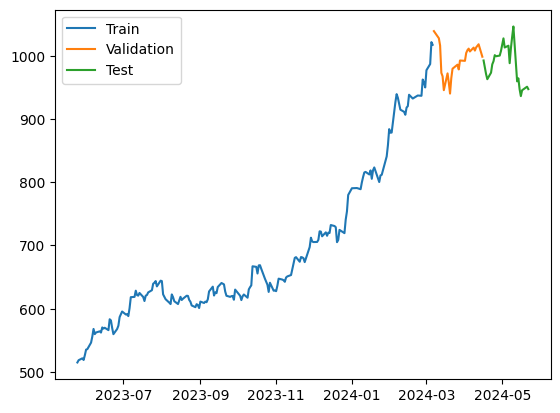

In [ ]:
plt.plot(Date_train, y_train)
plt.plot(Date_val, y_val)
plt.plot(Date_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

<Axes: >

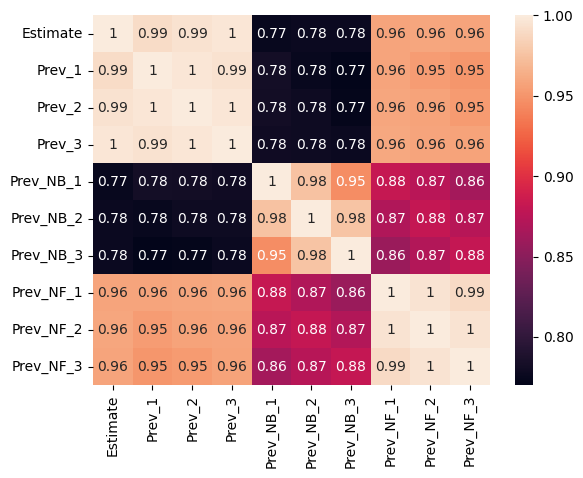

In [ ]:
import seaborn as sns

sns.heatmap(df.drop('Date', axis=1).corr(), annot=True)

In [ ]:
X_train.shape

(189, 9)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
reg_val_predictions = model.predict(X_val)
reg_train_predictions = model.predict(X_train)
reg_test_predictions = model.predict(X_test)

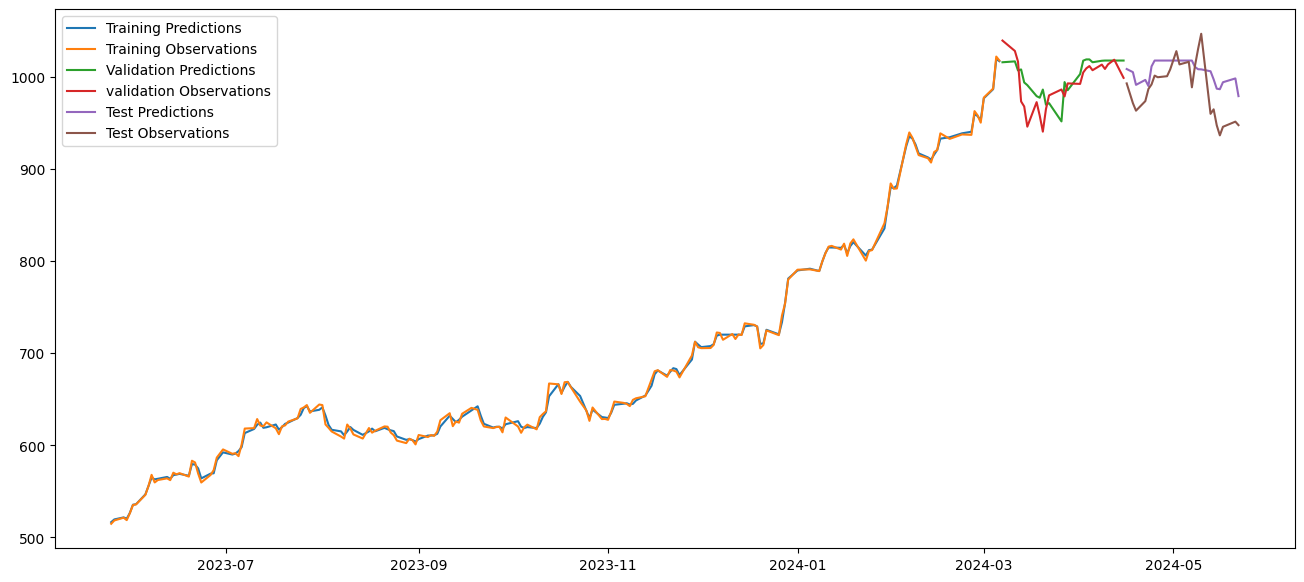

In [ ]:
plt.figure(figsize=(16, 7))
plt.plot(Date_train, reg_train_predictions)
plt.plot(Date_train, y_train.flatten())
plt.plot(Date_val, reg_val_predictions)
plt.plot(Date_val, y_val.flatten())
plt.plot(Date_test, reg_test_predictions)
plt.plot(Date_test, y_test.flatten())
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'validation Observations', 'Test Predictions', 'Test Observations'])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 9), y_train)
reg.score(X_train.reshape(-1, 9), y_train)
reg.coef_
reg.intercept_

-16.696165401343023

In [ ]:
reg_val_predictions = reg.predict(X_val.reshape(-1, 9))
reg_train_predictions = reg.predict(X_train.reshape(-1, 9))
reg_test_predictions = reg.predict(X_test.reshape(-1, 9))

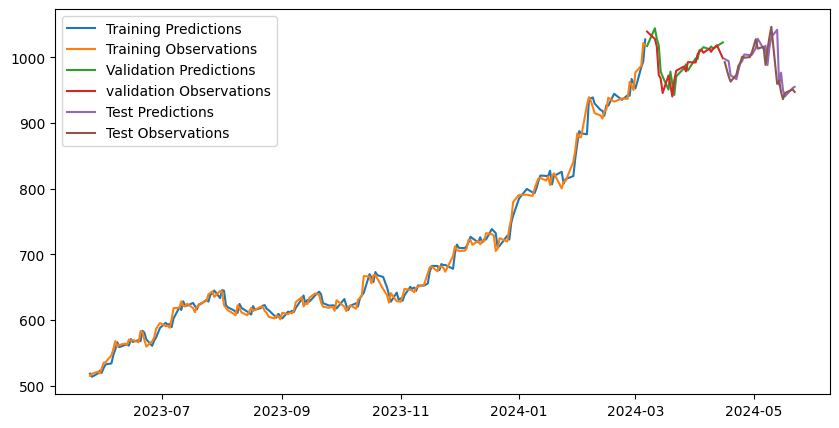

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(Date_train, reg_train_predictions)
plt.plot(Date_train, y_train.flatten())
plt.plot(Date_val, reg_val_predictions)
plt.plot(Date_val, y_val.flatten())
plt.plot(Date_test, reg_test_predictions)
plt.plot(Date_test, y_test.flatten())
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'validation Observations', 'Test Predictions', 'Test Observations'])